# Изучение рынка заведений общественного питания Москвы для Shut Up and Take My Money

## Цель и задачи  

**Цель:** Провести исследовательский анализ рынка общественного питания Москвы для выбора подходящего инвесторам места нового заведения общественного питания.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы по проведённому анализу.


## Данные

Для анализа поступили данные с заведениями общественного питания Москвы. Данные состоят из двух датасетов:

- `rest_info.csv` — информация о заведениях общественного питания;
- `rest_price.csv` —  информация о среднем чеке в заведениях общественного питания.

### Описание датасета `rest_info`
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  - 0 — заведение не является сетевым;
  - 1 — заведение является сетевым.
- seats — количество посадочных мест.

### Описание датасета `clients_information`
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
  - «Средний счёт: 1000–1500 ₽»;
  - «Цена чашки капучино: 130–220 ₽»;
  - «Цена бокала пива: 400–600 ₽» и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
 
## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

---


## 1. Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `rest_info` и `rest_price`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `rest_df` и `price_df`.

In [1]:
# Загружаем библиотеки
!pip install pandas matplotlib seaborn phik

In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
# Выгружаем данные в переменные 
rest_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv ')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [4]:
# Выводим первые строки датафрейма на экран
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Данные содержат как числовые, так и строковые значения и хранятся в типах данных `int64`, `float64` и `object`. Значения в столбцах `id`, `name`, `category`, `address`, `district` и `hours` представлены строками. Некоторые из них содержат числа, например, столбец `hours` с графигом работы заведения и при необходимости эти данные можно оптимизировать.
- Пропуски содержатся в столбцах `hours`, `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [6]:
# Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания. По аналогии с предыдущим датасетом можно отметить, что:

- Типы данных соответствуют содержимому. Тип данных для столбца `avg_bill` можно будет оптимизировать, если нам понадобятся данные для рассчета из этого столбца.
- Пропусков на первый взгляд много, они содержатся почти во всех столбцах кроме `id`. Нужно выяснить, с чем это связано и заменить или удалить их для дальнейший рассчетов. 
- Значения в столбцах соответствуют описанию.

Первичное знакомство показывает, что данные хорошего качества — они соответствуют описанию и выглядят корректными, однако стоит узнать, в чем причина частых пропусков во втором датасете.

Прежде чем мы пойдем дальше, нужно объединить датафреймы в один.

In [8]:
# Объединяем датафреймы в единый df
df = rest_df.merge(price_df, how='left', on='id')

In [9]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Данные соединены, можно приступать к следующему шагу - предоработка данных
___

## 2. Предобработка данных

### 2.1. Изучение типов данных

С данными здесь работы не так много — проверим типы данных, затем изучим пропуски, возможно, они как-то влияют на их тип.

In [10]:
# Выведем данные, чтобы сравить их с типом
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [11]:
# Проверка типов данных
print("Типы данных до преобразования:")
print(df.dtypes)

Типы данных до преобразования:
id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object


Можно заметить, что в столбце `chain` тип данных `int64`, хотя он содержит бинарный признак (0 или 1),  можно привести к `bool`:

In [12]:
# приведем chain к bool
df['chain'] = df['chain'].astype(bool)

In [13]:
# Проверим, произошло ли преобразование
print("Типы данных после преобразования:")
print(df.dtypes)

Типы данных после преобразования:
id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   bool
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object


Можно было бы также поменять тип данных в столбце `seats`, однако он содержит множество пропусков, и, скорее всего именно из-за них его тип данных `float64`, однако это не критично и мы разберемся с `seats` дальше, когда будем работать непосредственно с пропусками

### 2.2. Проверяем наличие пропусков в данных
При первичном анализе мы обнаружили множество пропусков. Узнаем их абсолютное и относительное количество.

In [14]:
# Применяем метод isna() к датафрейму df
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [15]:
# Подсчитываем долю строк с пропусками
df.isna().mean().sort_values(ascending=False)

middle_coffee_cup    0.936355
middle_avg_bill      0.625387
price                0.605639
avg_bill             0.546039
seats                0.429574
hours                0.063764
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
rating               0.000000
chain                0.000000
dtype: float64

В датафрейме `df` обнаружено 1539 пропусков в столбце `seats` — это 37% данных, а также 3523 пропусков в столбце `middle_coffee_cup` - это 87%. Количество пропусков достаточно большое, чтобы их просто удалить.

Пропуски в этом столбце могут быть вызваны:
- Отсутствием информации в источнике данных
- Ошибки при сборе или обработке данных
- Отсуствием значения в другом столбце, от которого зависит столбец с пропусками


Чтобы разобраться с пропусками, выведем медиану для пропусков в столбце `seats` и среднее значение для `price`, а пропуски в столбце `middle_coffee_cup` заменим другим пустым значением, потмоу что, исходя из данных, значения в этом столбце зависят от столбца `avg_bill` (Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт), поэтому это и не пропуски вовсе, мы заменим их другим значением, с `middle_avg_bill` та же ситуация, поэтому будем делать то же самое. Для столбцов `average_bill` и `hours` удалим пропуски, их незначительное количество.

In [16]:
# seats: заполняем медианным значением внутри категории заведения
df['seats'] = df.groupby('category')['seats'].transform(lambda x: x.fillna(x.median()))

In [17]:
# middle_coffee_cup и middle_avg_bill: заменяем NaN на -1, так как отсутствие данных означает их отсутствие, а не пропуск
df['middle_coffee_cup'] = df['middle_coffee_cup'].fillna(-1)
df['middle_avg_bill'] = df['middle_avg_bill'].fillna(-1)

In [18]:
# price: заполняем средним значением
df['price'] = df['price'].fillna(df['price'].mode()[0])

In [19]:
# Удаление строк с пропусками в столбце 'avg_bill' и 'hours'
df.dropna(subset=['avg_bill'], inplace=True)
df.dropna(subset=['hours'], inplace=True)

In [20]:
# Проверяем выполненную работу
df.isna().sum()

id                   0
name                 0
category             0
address              0
district             0
hours                0
rating               0
chain                0
seats                0
price                0
avg_bill             0
middle_avg_bill      0
middle_coffee_cup    0
dtype: int64

### 2.3. Проверяем наличие явных и неявных дубликатов в данных
Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов.
Для начала ормализуем данные в текстовых столбцах.

In [21]:
import re

def normalize_text(text):
    if pd.isna(text):  # Проверяем, что текст не пустой
        return text
    text = text.lower().strip()  # Приводим к нижнему регистру и убираем пробелы по краям
    text = re.sub(r'\s+', ' ', text)  # Убираем лишние пробелы между словами
    text = re.sub(r'[^\w\s]', '', text)  # Убираем знаки препинания
    text = text.replace('ё', 'е')  # Приводим "ё" к "е" для унификации
    return text

# Применяем к столбцу "name"
df['name'] = df['name'].apply(normalize_text)


In [22]:
# Проверяем полные дубликаты
df.duplicated().sum()

0

В датафреймах нет полных дубликатов строк. Проверим неявные дубликаты — значения по названию и адресу заведения

In [23]:
# Проверяем неявные дубликаты
df.duplicated(subset=['name','address']).sum()

0

Неявных дубликатов тоже нет. 


### 2.4. Выделяем новые столбцы
Для дальнейшей работы выделим новые столбцы:
- Столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение True — если заведение работает ежедневно и круглосуточно;
  - логическое значение False — в противоположном случае.

In [24]:
# Находим строки, содержащие оба слова 'ежедневно" и 'круглосуточно' и создаём столбец 'is_24_7'
df['is_24_7'] = df['hours'].str.contains('ежедневно', case=False, na=False) & \
    df['hours'].str.contains('круглосуточно', case=False, na=False)

display (df[['hours', 'is_24_7']].head (11))

,hours,is_24_7
1,"ежедневно, 10:00–22:00",False
2,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",False
3,"ежедневно, 09:00–22:00",False
4,"ежедневно, 10:00–22:00",False
6,пн 15:00–04:00; вт-вс 15:00–05:00,False
7,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",False
8,"ежедневно, 10:00–22:00",False
9,"ежедневно, 12:00–00:00",False
10,"ежедневно, круглосуточно",True
12,вт-сб 09:00–18:00,False


### 2.5. Промежуточный вывод
В результате предобработки данных были выполнены следующие действия:

- Изучены пропуски в данных. Пропуски обнаружились во многих столбцах, в трех из которых они составляли большую долю. Учитывая это количество, мы заменили пропуски на другие значения. В столбцах, где пропуски занимали незначительную часть, мы их удалили.
- Данные проверили на явные и неявные дубликаты — в данных их нет.
- Добавили столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7.

---

## 3. Исследовательский анализ данных

Для выполнения анализа данных ответим на вопросы:

### 3.1 Задача 1
Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [25]:
# Подсчёт количества заведений в каждой категории
category_counts = df['category'].value_counts()

# Выведем таблицу
print(category_counts)

ресторан           1040
кофейня             720
кафе                693
бар,паб             484
пиццерия            400
быстрое питание     237
столовая            181
булочная             53
Name: category, dtype: int64


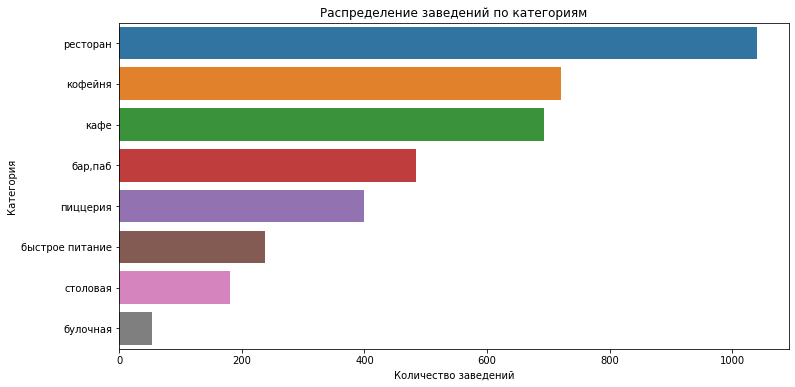

In [26]:
# Сделаем диаграмму
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index)

plt.xlabel("Количество заведений")
plt.ylabel("Категория")
plt.title("Распределение заведений по категориям")
plt.show()

На диаграмме можно с легкостью заметить, что ресторан - категория номер 1 среди заведений. За ней идут кофейня и кафе, занимая почти равнве позиции.

### 3.2 Задача 2
Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [27]:
# Выведем список уникальных административных районов Москвы
districts = df['district'].unique()
print(districts)

['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']


In [28]:
# Подсчёт количества заведений в каждом районе
district_counts = df['district'].value_counts()

print(district_counts)

Центральный административный округ         1288
Северный административный округ             413
Южный административный округ                372
Северо-Восточный административный округ     368
Западный административный округ             360
Восточный административный округ            310
Юго-Западный административный округ         276
Юго-Восточный административный округ        236
Северо-Западный административный округ      185
Name: district, dtype: int64


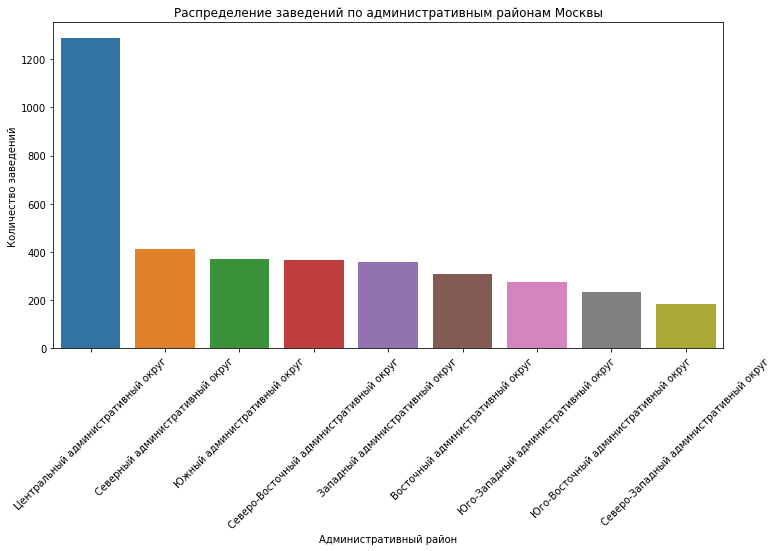

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x=district_counts.index, y=district_counts.values)

plt.xlabel("Административный район")
plt.ylabel("Количество заведений")
plt.title("Распределение заведений по административным районам Москвы")
plt.xticks(rotation=45)  # Поворачиваем подписи для удобства
plt.show()

In [30]:
# Фильтруем данные по Центральному административному округу
df_cao = df[df['district'] == 'Центральный административный округ']

# Подсчёт количества заведений в каждой категории в ЦАО
category_counts_cao = df_cao['category'].value_counts()

print(category_counts_cao)

ресторан           406
кофейня            246
бар,паб            243
кафе               208
пиццерия            81
быстрое питание     48
столовая            44
булочная            12
Name: category, dtype: int64


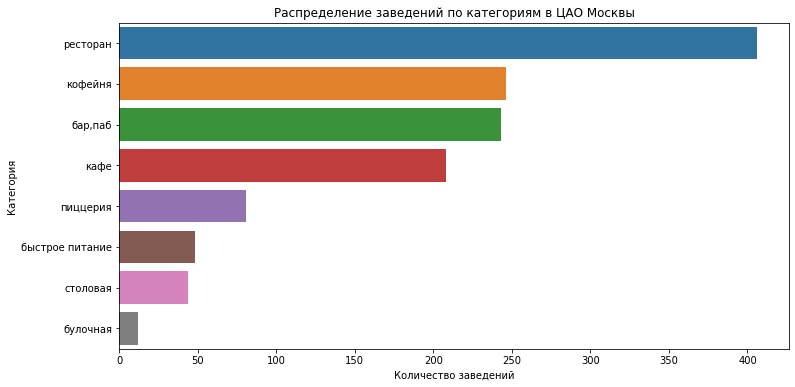

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(y=category_counts_cao.index, x=category_counts_cao.values)

plt.xlabel("Количество заведений")
plt.ylabel("Категория")
plt.title("Распределение заведений по категориям в ЦАО Москвы")
plt.show()

В ходе анализа мы увидели, что ЦАО - самый популярный район для заведений общетсвенного питания. Самая популярная категория заведений в ЦАО все так же остается ресторан. Однако нужно отметить, что на третьем месте теперь не кафе, а бар, паб. Это может значить, что в ЦАО больше любят отдохнуть в вечернее время или по выходным, а также выпить что-то алкогольное.

### 3.3 Задача 3
Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

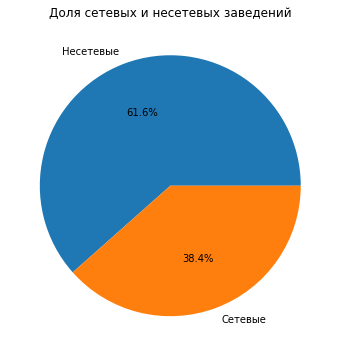

In [32]:
# Подсчет долей сетевых и несетевых заведений
chain_proportions = df['chain'].value_counts(normalize=True) * 100

# Визуализация круговой диаграммой
plt.figure(figsize=(6, 6))
chain_proportions.plot(kind="pie", autopct="%1.1f%%", labels=['Несетевые', 'Сетевые'])

plt.title("Доля сетевых и несетевых заведений")
plt.ylabel("")
plt.show()

In [33]:
# Группируем данные по категории и признаку chain
category_chain_proportions = df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Переименовываем столбцы для удобства
category_chain_proportions.columns = ['Несетевые', 'Сетевые']

# Выведем таблицу с данными
print(category_chain_proportions)

                 Несетевые    Сетевые
category                             
бар,паб          77.685950  22.314050
булочная         62.264151  37.735849
быстрое питание  56.540084  43.459916
кафе             62.626263  37.373737
кофейня          51.388889  48.611111
пиццерия         43.750000  56.250000
ресторан         66.923077  33.076923
столовая         69.613260  30.386740


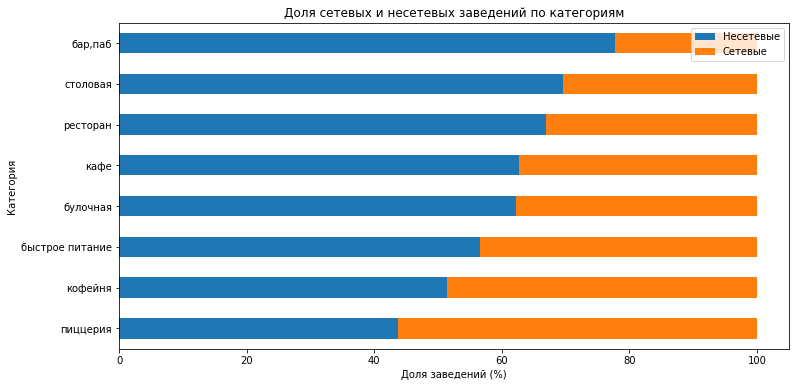

In [34]:
# Построим график
category_chain_proportions.sort_values(by='Сетевые', ascending=False).plot(
    kind='barh', stacked=True, figsize=(12, 6))

plt.xlabel("Доля заведений (%)")
plt.ylabel("Категория")
plt.title("Доля сетевых и несетевых заведений по категориям")
plt.legend(["Несетевые", "Сетевые"])
plt.show()

- По всем данным несетевых заведений больше - они составляют 61,6%
- В разрезе категорий заведения несетевые заведения также лидируют
- В категориях "пиццерия" и "кофейня" данные уходят в значение 50/50, что говорит о том, что эти заведения намного чаще являются сетевыми

### 3.4 Задача 4
Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.

In [35]:
# Основные статистические характеристики
print(df['seats'].describe())

# Проверим наличие нулевых или отрицательных значений
print(df[df['seats'] <= 0])

count    3808.000000
mean       96.977022
std        93.710463
min         0.000000
25%        55.000000
50%        80.000000
75%        95.000000
max      1288.000000
Name: seats, dtype: float64
                                    id                        name  \
84    3793bd736bbb4dd08f734d53bfa57b24            meat doner kebab   
306   6453f9dbe2e84457851a9f7a4b3a267d              everest coffee   
424   074abbda7c9a47f29a6cbb394230657b                    паб 2813   
519   a15c0ce652ec4fe9916dad97ce1ee330                      шаурма   
521   ea7ade6597774dc9ac7d3c846c8faeb9                     рандеву   
846   87d2d392a79842089b5116471290eee0               доминос пицца   
1183  6698eacd72ab45b59c02b9a622aabd34           сладкая параллель   
1187  247be910acbd4a238ef7971045cc11fd            рожь хлеб и кофе   
1232  ee0cdda49fff40deab1cfa6a740c5602                    афросиаб   
1623  d78740a2acc548d197a061af785fa209                        icup   
2323  8e8c0caf170e48d4b688ef1d9d98

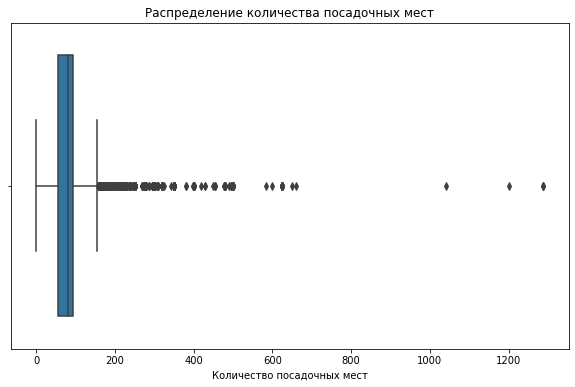

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['seats'])
plt.xlabel("Количество посадочных мест")
plt.title("Распределение количества посадочных мест")
plt.show()

In [37]:
# Группировка по категории с расчетом медианы и среднего
seats_by_category = df.groupby('category')['seats'].agg(['median', 'mean']).sort_values(by='median', ascending=False)

print(seats_by_category)

                 median        mean
category                           
ресторан           86.0  112.043269
бар,паб            82.5  107.123967
кофейня            80.0   96.247222
столовая           75.5   90.035912
быстрое питание    65.0   90.751055
кафе               60.0   77.744589
пиццерия           55.0   88.380000
булочная           50.0   86.490566


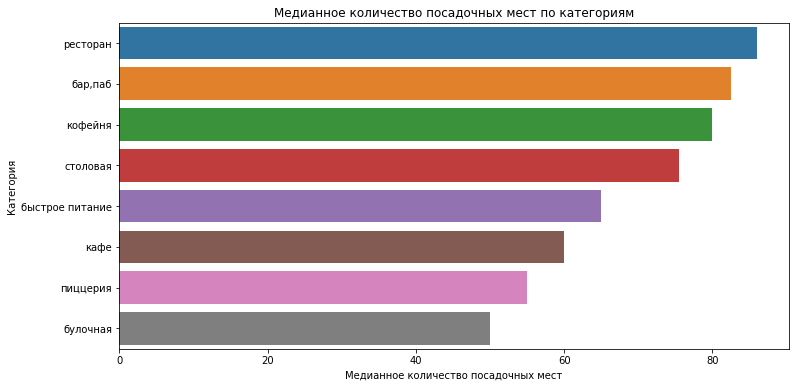

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(y=seats_by_category.index, x=seats_by_category['median'])

plt.xlabel("Медианное количество посадочных мест")
plt.ylabel("Категория")
plt.title("Медианное количество посадочных мест по категориям")
plt.show()

В данных присутствуют выбросы, это может быть связано с:
- Фуд-корты, торговые центры, спортивные комплексы могут иметь тысячи мест,
- Заведения в формате самообслуживания могут иметь слишком мало мест.

Медиана и среднее значение также сильно отличаются в некоторых категориях, это может говорить о том, что в некоторых районах нет большого спроса или, наоборот, есть районы с очень большим посадочным спросом.

В среднем больше всего посадочных мест приходится на категорию "ресторан", меньше всего на категории "пицца" и "кафе".

### 3.5 Задача 5
Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [39]:
# Проверим основные статистические характеристики рейтингов
print(df['rating'].describe())

# Проверим наличие пустых или некорректных значений
print(df[df['rating'].isna()])

count    3808.000000
mean        4.302547
std         0.321649
min         1.000000
25%         4.200000
50%         4.300000
75%         4.500000
max         5.000000
Name: rating, dtype: float64
Empty DataFrame
Columns: [id, name, category, address, district, hours, rating, chain, seats, price, avg_bill, middle_avg_bill, middle_coffee_cup, is_24_7]
Index: []


In [40]:
# Рассчитаем средний рейтинг по категориям
rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)

print(rating_by_category)

category
бар,паб            4.430785
ресторан           4.370000
пиццерия           4.303250
кофейня            4.302917
столовая           4.243094
кафе               4.197835
булочная           4.164151
быстрое питание    4.124895
Name: rating, dtype: float64


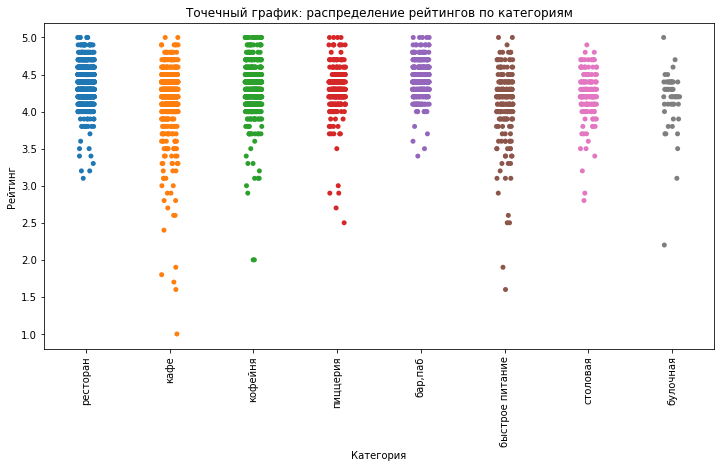

In [41]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='category', y='rating', data=df, jitter=True)

plt.xticks(rotation=90)
plt.xlabel("Категория")
plt.ylabel("Рейтинг")
plt.title("Точечный график: распределение рейтингов по категориям")
plt.show()
plt.show()

У всех категорий довольно хороший рейтинг. Усреднённые рейтинги не сильно различаются для разных типов общепита. 

Так как рейтинг почти одинаковый у всех категорий, можно обратить внимание на аномальные значения. Например, в категории "кафе" самое большое количество плохого рейтинга, хотя показателей и мало.

### 3.6 Задача 6
Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [42]:
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'rating']].phik_matrix() # Cтроим корреляционную матрицу
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['seats', 'rating']


,rating
price,0.215333
category,0.210145
district,0.188288
chain,0.138050
is_24_7,0.120925
seats,0.000000


Наибольшая корреляция рейтинга наблюдается в "price" (0.215), затем идет "category" (0.210) и "distinct" (0.188)

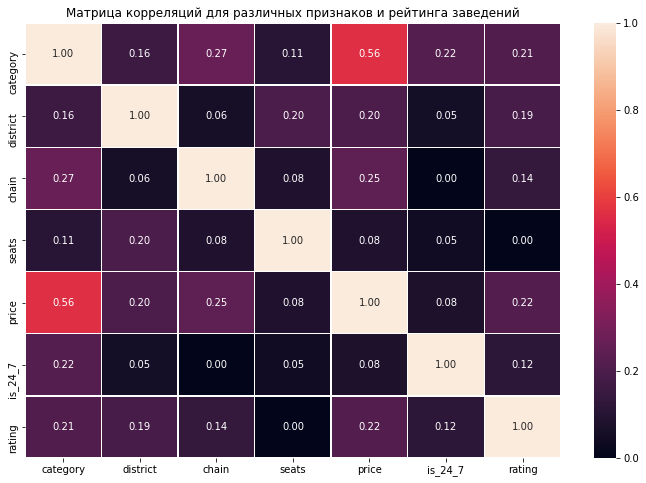

In [43]:
# Визуализируем тепловую карту
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)

plt.title("Матрица корреляций для различных признаков и рейтинга заведений")
plt.show()

Мы проверили связь корреляционной матрицы, и самой сильной связью так и остались "price" и "category"

### 3.7 Задача 7
Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [44]:
# Группируем данные по названию заведения
grouped = df.groupby('name').agg(
    total_count=('name', 'size'),
    average_rating=('rating', 'mean'),
    category=('category', 'first')
)

# Отсортируем по количеству заведений в сети
top_15_popular_chains = grouped.sort_values(by='total_count', ascending=False).head(15)

# Выводим топ-15 популярных сетей
top_15_popular_chains[['total_count', 'average_rating', 'category']]

,total_count,average_rating,category
name,,,
шоколадница,74,4.175676,кофейня
додо пицца,72,4.287500,пиццерия
доминос пицца,36,4.163889,пиццерия
cofix,35,4.082857,кофейня
кофепорт,30,4.120000,кофейня
кулинарная лавка братьев караваевых,29,4.396552,кафе
prime,25,4.124000,ресторан
теремок,23,4.182609,ресторан
муму,19,4.268421,кафе


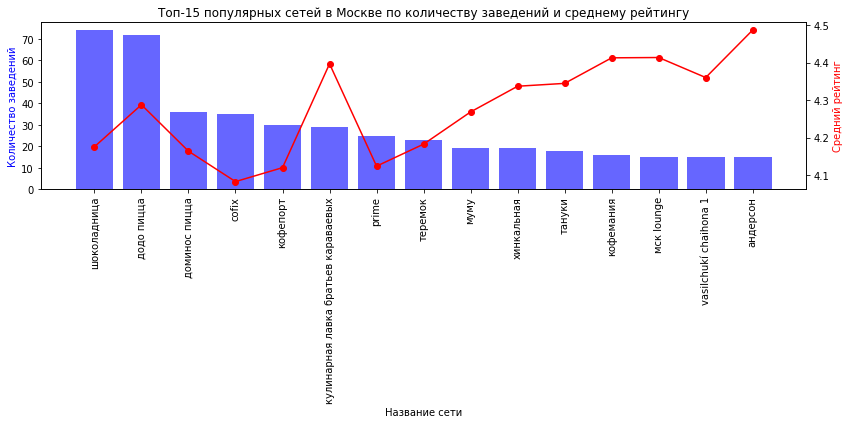

In [45]:
# Визуализируем количество заведений и средний рейтинг для топ-15 сетей
fig, ax1 = plt.subplots(figsize=(12, 6))

# Гистограмма для количества заведений
ax1.bar(top_15_popular_chains.index, top_15_popular_chains['total_count'], color='b', alpha=0.6, label='Количество заведений')
ax1.set_xlabel('Название сети')
ax1.set_ylabel('Количество заведений', color='b')
ax1.tick_params(axis='x', rotation=90)

# Вторая ось для среднего рейтинга
ax2 = ax1.twinx()
ax2.plot(top_15_popular_chains.index, top_15_popular_chains['average_rating'], color='r', marker='o', label='Средний рейтинг')
ax2.set_ylabel('Средний рейтинг', color='r')

# Заголовок
plt.title('Топ-15 популярных сетей в Москве по количеству заведений и среднему рейтингу')
plt.tight_layout()
plt.show()

На первом месте по популярности "шоколадница" в категории "кафе", всего 74 заведения и средний рейтинг составляет 4.17.

За ней следуют 2 пиццерии, за ними - 2 кофейни. Стоит отметить, что у сетевых кофеен в сравнении довольно низкий рейтинг, например, самый низкий рейтинг из всего топ-15 у "cofix", он составляет 4.0.

### 3.8 Задача 8
Изучите вариацию среднего чека заведения (столбец middle_avg_bill) в зависимости от района Москвы. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.

In [46]:
# Группировка по районам и расчет среднего и медианного чека
avg_bill_by_district = df.groupby('district')['middle_avg_bill'].agg(['mean', 'median']).reset_index()

# Переименуем столбцы для удобства
avg_bill_by_district = avg_bill_by_district.rename(columns={'mean': 'mean_avg_bill', 'median': 'median_avg_bill'})

print(avg_bill_by_district)

                                  district  mean_avg_bill  median_avg_bill
0         Восточный административный округ     688.106452            450.0
1          Западный административный округ     892.033333            610.0
2          Северный административный округ     723.273608            450.0
3  Северо-Восточный административный округ     585.959239            400.0
4   Северо-Западный административный округ     697.627027            475.0
5       Центральный административный округ     976.855590            800.0
6     Юго-Восточный административный округ     537.512712            372.0
7      Юго-Западный административный округ     674.677536            500.0
8             Южный административный округ     701.252688            425.0


In [47]:
# Данные для центрального округа
central_district = df[df['district'] == 'Центральный административный округ']

# Данные для остальных округов
other_districts = df[df['district'] != 'Центральный административный округ']

# Средний чек в центральном округе
central_avg_bill = central_district['middle_avg_bill'].mean()

# Средний чек в других округах
other_avg_bill = other_districts['middle_avg_bill'].mean()

print(f"Средний чек в центральном округе: {central_avg_bill}")
print(f"Средний чек в других округах: {other_avg_bill}")

Средний чек в центральном округе: 976.8555900621118
Средний чек в других округах: 695.1511904761904


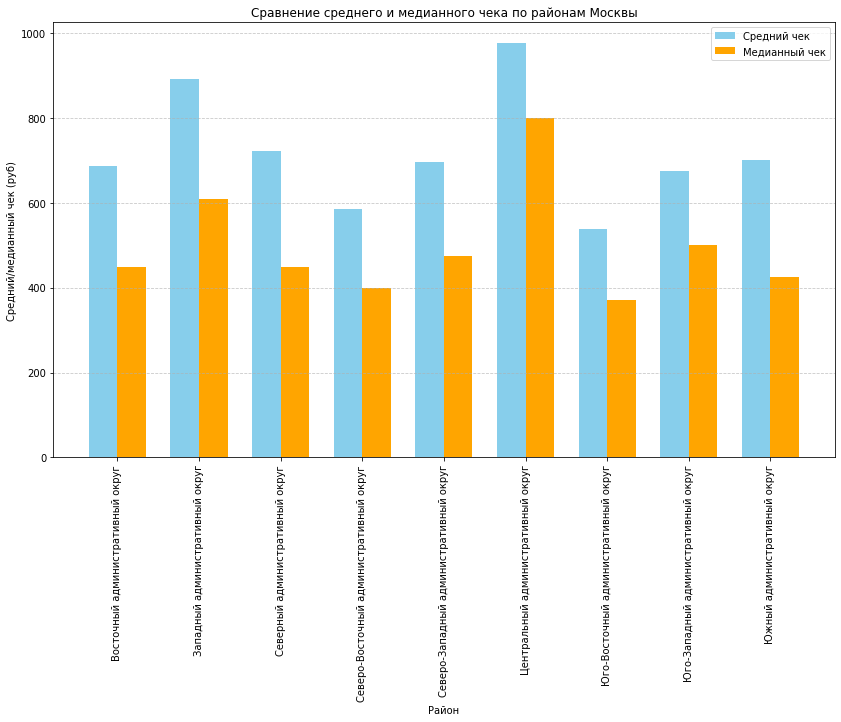

In [48]:
import numpy as np
# Подготовка данных для визуализации
districts = avg_bill_by_district['district']
mean_values = avg_bill_by_district['mean_avg_bill']
median_values = avg_bill_by_district['median_avg_bill']

# Позиции для столбцов
x = np.arange(len(districts))

# Построение графика
plt.figure(figsize=(14, 8))
bar_width = 0.35

plt.bar(x - bar_width/2, mean_values, width=bar_width, label='Средний чек', color='skyblue')
plt.bar(x + bar_width/2, median_values, width=bar_width, label='Медианный чек', color='orange')

plt.xticks(x, districts, rotation=90)
plt.title('Сравнение среднего и медианного чека по районам Москвы')
plt.xlabel('Район')
plt.ylabel('Средний/медианный чек (руб)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

В ЦАО средний и медианный чеки намного выше. Можно сказать, что удаленность от центра сильно влияет на размер чека: чем дальше, тем средний чек бдует меньше.

## Итоговый вывод и рекомендации

В результате анализа данных были выявлены ключевые паттерны в соотношении цен, рейтингов, категорий заведений и их расположения в Москве. Учитывая эти выводы, заказчик может эффективно планировать открытие новых заведений, ориентируясь на экономические реалии и предпочтения московской аудитории.

### Общий обзор проделанной работы
В ходе исследовательского анализа данных о заведениях общественного питания в Москве были проведены следующие этапы:
- Выполнена очистка данных, удаление пропусков и нормализация текстовых данных, таких как название заведения и адрес. Также были исправлены и обработаны аномальные значения в столбцах, таких как средний чек и количество посадочных мест.
- Исследована вариация цен (среднего чека) в зависимости от района города и категории заведения.
- Проведен анализ различий в ценах между Центральным административным округом (ЦАО) и остальными районами.
- Проведён анализ распределения заведений по категориям, административным районам, а также соотношение сетевых и несетевых заведений.


### Ответы на исследовательские вопросы, или главные выводы
- Из данных видно, что большинство заведений — это кафе и рестораны, при этом наибольшее количество сетевых заведений сосредоточено в таких категориях, как «ресторан» и «кофейня».
-  Заведения в Центральном административном округе демонстрируют более высокие средние чеки по сравнению с заведениями в других районах.
-  В Москве наблюдается преобладание несетевых заведений в таких категориях, как кафе и рестораны, что подтверждается более высоким количеством заведений в этих категориях.

### Рекомендации на основе анализа данных
- Рекомендуется обратить внимание на ЦАО, так как заведениями в этом округе свойственен более высокий средний чек и спрос.
- Для создания успешной сети стоит рассмотреть популярные категории, такие как кофейни и рестораны.
- Для несетевых заведений стоит уделить особое внимание клиентскому сервису и улучшению репутации, так как высокий рейтинг напрямую влияет на популярность заведения